[Text(0.5, 0, 'Time (s)'), Text(0, 0.5, 'Amplitude')]

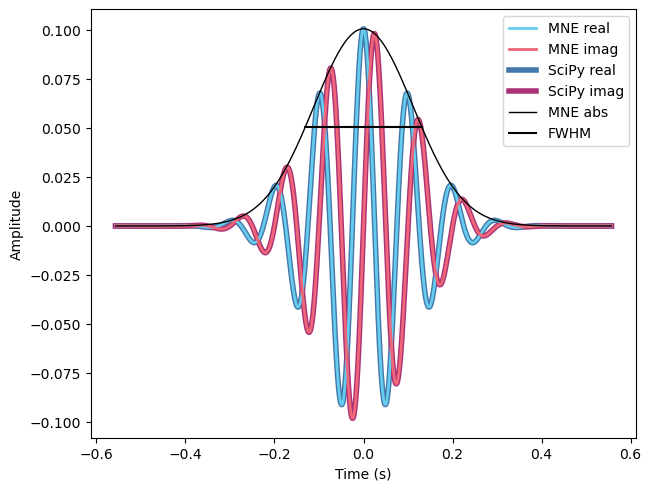

In [1]:
import numpy as np
from scipy.signal import morlet2 as sp_morlet
import matplotlib.pyplot as plt
from mne.time_frequency import morlet, fwhm

sfreq, freq, n_cycles = 1000., 10, 7  # i.e., 700 ms
this_fwhm = fwhm(freq, n_cycles)
wavelet = morlet(sfreq=sfreq, freqs=freq, n_cycles=n_cycles)
M, w = len(wavelet), n_cycles # convert to SciPy convention
s = w * sfreq / (2 * freq * np.pi)  # from SciPy docs
wavelet_sp = sp_morlet(M, s, w) * np.sqrt(2) 

_, ax = plt.subplots(constrained_layout=True)
colors = {
    ('MNE', 'real'): '#66CCEE',
    ('SciPy', 'real'): '#4477AA',
    ('MNE', 'imag'): '#EE6677',
    ('SciPy', 'imag'): '#AA3377',
}
lw = dict(MNE=2, SciPy=4)
zorder = dict(MNE=5, SciPy=4)
t = np.arange(-M // 2 + 1, M // 2 + 1) / sfreq
for name, w in (('MNE', wavelet), ('SciPy', wavelet_sp)):
    for kind in ('real', 'imag'):
        ax.plot(t, getattr(w, kind), label=f'{name} {kind}',
                lw=lw[name], color=colors[(name, kind)],
                zorder=zorder[name])
ax.plot(t, np.abs(wavelet), label=f'MNE abs', color='k', lw=1., zorder=6)
half_max = np.max(np.abs(wavelet)) / 2.
ax.plot([-this_fwhm / 2., this_fwhm / 2.], [half_max, half_max],
        color='k', linestyle='-', label='FWHM', zorder=6)
ax.legend(loc='upper right')
ax.set(xlabel='Time (s)', ylabel='Amplitude')